In [6]:
%matplotlib inline
import skimage.color
import skimage.io
import skimage.filters
import numpy

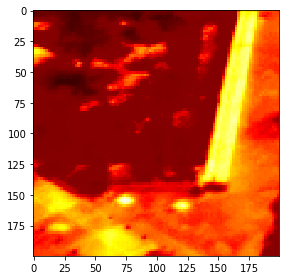

In [96]:
raw = skimage.io.imread("AthenIR.png")
img = skimage.color.rgb2gray(raw)
img = img[400:600, 400:600]
skimage.io.imshow(img, cmap='hot')

float64


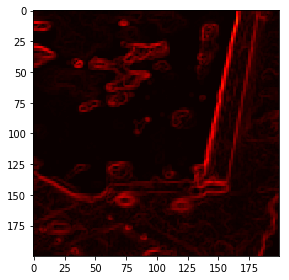

In [113]:
# -*- coding: utf-8 -*-
"""
Skeleton for exercize on edge operators
"""

def convolve_kernel(image, kernel):
    if kernel.shape != (3, 3):
        raise ValueError("Kernel must have shape 3x3")
    
    out = numpy.ndarray(shape=image.shape, dtype=image.dtype)
    height, width = image.shape
    
    for x in range(0, width):
        for y in range(0, height):
            new_value = 0.0
            for kx in range(0, kernel.shape[1]):
                for ky in range(0, kernel.shape[0]):
                    # if trying to access outside image, instead use closest value
                    sx = min(max(x+kx-1, 0), width-1)
                    sy = min(max(y+ky-1, 0), height-1)
                    #sx = x+kx-1
                    #sy = y+ky-1
                    k = kernel[ky][kx]
                    s = image[sy][sx]
                    new_value += (s * k)
                    #print((x, y), (sx, sy), k, new_value)
            out[y][x] = new_value
    return out
    
kernels = {
    'prewitt_x': numpy.array((
        (-1, 0, 1),
        (-1, 0, 1),
        (-1, 0, 1),
     )) / 3.0,
    'prewitt_y': numpy.array((
        (-1, -1, -1),
        (0, 0, 0),
        (1, 1, 1),
     )) / 3.0,
    'sobel_x': numpy.array((
        (-1, 0, 1),
        (-2, 0, 2),
        (-1, 0, 1),
     )) / 4.0,
    'sobel_y': numpy.array((
        (-1, -2, -1),
        (0, 0, 0),
        (1, 2, 1),
     )) / 4.0,
    'goodsobel_x': numpy.array((
        (-3, 0, 3),
        (-10, 0, 10),
        (-3, 0, 3),
     )) / 16.0,
    'goodsobel_y': numpy.array((
        (-3, -10, -3),
        (0, 0, 0),
        (3, 10, 3),
     )) / 16.0,
    'boxblur': numpy.array((
        (1, 1, 1),
        (1, 1, 1),
        (1, 1, 1),
     )) / 9.0,
    'laplacian4': numpy.array((
        (0, 1, 0),
        (1, -4, 1),
        (0, 1, 0),
     )) / 1.0,
    'laplacian12': numpy.array((
        (1, 2, 1),
        (2, -12, 2),
        (1, 2, 1),
     )) / 1.0,
}
                             
def edge_operator(image, operator):
    """Returns the reusult from one of the edge operators, prewitt, sobel,
    canny eller laplace
    Parameters:
    -----------
    image : np.ndarray
    Image to detect blobs in. If this image is a colour image then
    the last dimension will be the colour value (as RGB values).
    operator : numeric
    1. = sobel filter
    2. = prewitt filter
    3. = canny filter
    4. = laplace filter
    Returns:
    --------
    filtered : np.ndarray(np.uint)
    result image from the edge operator
    """
    
    operator = 'sobel'

    if operator == 'sobel':
        kernel_x = kernels['sobel_x']
        kernel_y = kernels['sobel_y']
        x = convolve_kernel(image, kernel_x)
        y = convolve_kernel(image, kernel_y)
        return numpy.sqrt(x**2 + y**2)
    elif operator == 'laplacian':
        k = kernels['laplacian4']
        l = numpy.abs(convolve_kernel(image, k))
        return l
    
    #filtered = numpy.sqrt(x**2) # y**2 + x**2
    
    #magnitude /= numpy.sqrt(2)  
    filtered = magnitude
    #filtered = convolve_kernel(image, kernels['boxblur'])
    
    # sobel and prewitt are simple edge filters with two 3x3 kernels, one for X, and one for Y direction
    # There is also a modified Sobel with better cofficients (total=32)
    
    # Laplacian (p.139) can be expressed as one 3x3 kernel for both x and y
    
    # Canny (p.133) is more complicated
    # Smooth image with Gaussian filter
    # Calculate x/y gradient vector, local gradient magnitude/orientation
    # Isolate local maxima of gradient magnitude using 'non-maximum supression' along local gradient direction
    # Collect sets of connected edge pixels from local maxima using hysteresis threshold
    
    return filtered


raw = skimage.io.imread("AthenIR.png")
img = skimage.color.rgb2gray(raw)
print(img.dtype)
img = img[400:600, 400:600]
my = edge_operator(img, 'sobel')
#print(img.shape)
#skimage.io.imshow(raw)

skimage.io.imshow(my, cmap='hot')

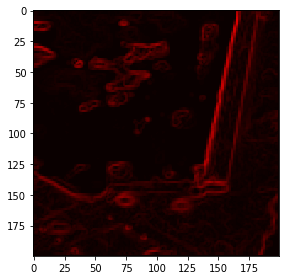

In [84]:
filtered = skimage.filters.sobel(img)
skimage.io.imshow(filtered, cmap='hot')

In [9]:
def sharpen(image, sharpmask):
    """Performs an image sharpening using Laplace filter or unsharpen mask 
    (USM)
    1. = Laplace
    2. = USM
    Returns: sharpened image
    """
    
    # Laplace sharpening done by applying Laplacian filter,
    # then from image subtracting a fraction of it 
    
    # Unsharpen-mask
    # Subtract from input a smoothened image, result is the mask
    # Add the mask to input, weigthed by factor A
    # Smoothening filter is typically a Gaussian filter
    
    return sharpened

describe the resulting images. Which algorithms and with which parameters do you think yielded the best image sharpening in this case 